FIFA 2020

PROBLEM STATEMENT

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Explore football skills and cluster football players based on their attributes.

Task3:- Explore the data and attempt all the below asked questions in a
step by step manner:
     
     ● Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
     
     ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
     
     ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 


IMPORTING AND READING DATASET

In [3]:
#import the basic libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df = pd.read_csv('players_20.csv')

UNDERSTAND DATASET

In [5]:
df.shape

(18278, 104)

In [16]:
df.head(pd.set_option('display.max_columns',None))

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [6]:
# Basic info
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB
None


In [7]:
# Summary statistics
print("\n--- Summary Statistics ---")
df.describe().T


--- Summary Statistics ---


,count,mean,std,min,25%,50%,75%,max
sofifa_id,18278.0,219738.864482,27960.200461,768.0,204445.5,226165.0,240795.75,252905.0
age,18278.0,25.283291,4.656964,16.0,22.0,25.0,29.00,42.0
height_cm,18278.0,181.362184,6.756961,156.0,177.0,181.0,186.00,205.0
weight_kg,18278.0,75.276343,7.047744,50.0,70.0,75.0,80.00,110.0
overall,18278.0,66.244994,6.949953,48.0,62.0,66.0,71.00,94.0
...,...,...,...,...,...,...,...,...
goalkeeping_diving,18278.0,16.572765,17.738069,1.0,8.0,11.0,14.00,90.0
goalkeeping_handling,18278.0,16.354853,16.996925,1.0,8.0,11.0,14.00,92.0
goalkeeping_kicking,18278.0,16.212934,16.613665,1.0,8.0,11.0,14.00,93.0
goalkeeping_positioning,18278.0,16.368038,17.136497,1.0,8.0,11.0,14.00,91.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
player_url,18278,18278,https://sofifa.com/player/233449/ximing-pan/20...,1
short_name,18278,17354,J. Rodríguez,11
long_name,18278,18218,Liam Kelly,3
dob,18278,6142,1992-02-29,113
nationality,18278,162,England,1667
club,18278,698,Wolverhampton Wanderers,33
player_positions,18278,643,CB,2322
preferred_foot,18278,2,Right,13960
work_rate,18278,9,Medium/Medium,9875
body_type,18278,10,Normal,10750


In [6]:
# remove the columns which are not appropriate to goal keepers for analyzation

df.drop(['player_url', 'sofifa_id', 'long_name', 'loaned_from', 'nation_jersey_number',
'player_tags', 'nation_position', 'player_positions','goalkeeping_diving', 'goalkeeping_handling',
'goalkeeping_kicking', 'goalkeeping_positioning','goalkeeping_reflexes','loaned_from','nation_jersey_number'], axis=1 ,inplace=True)

In [4]:
df.head()

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


Insights 

* Player_position have many position tags of the players, Deleting it will not make any changes because we have team_position with noly one position tags of player. 

EDA-EXPLORATORY DATA ANALYSIS

In [19]:
df.columns.values

array(['short_name', 'age', 'dob', 'height_cm', 'weight_kg',
       'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'team_position', 'team_jersey_number',
       'joined', 'contract_valid_until', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
       'player_traits', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
  

NULL VALUES AND DUPLICATES

In [20]:
# show all the null values with max number in descending Order.
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)


gk_diving               16242
gk_reflexes             16242
gk_kicking              16242
gk_handling             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
dribbling                2036
defending                2036
shooting                 2036
pace                     2036
passing                  2036
ram                      2036
lm                       2036
lcm                      2036
cm                       2036
rcm                      2036
physic                   2036
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
cdm                      2036
rdm                      2036
rwb                      2036
lb                       2036
lcb                      2036
rm        

In [21]:
df.duplicated().sum()

np.int64(0)

VISUALIZATIONS 

Height 

In [7]:
# Printing the number of players based on their height in cm.

df["height_cm"].value_counts()

height_cm
180    1468
178    1213
185    1193
183    1160
175     990
188     904
182     833
184     820
186     774
177     722
181     704
187     682
176     669
179     641
190     585
173     567
174     483
191     464
170     455
189     439
172     412
193     316
192     290
171     262
168     195
194     173
169     149
196     139
195     136
167     102
165      68
166      60
197      51
198      35
163      29
164      21
199      14
162      12
201      11
200      10
203       6
161       5
202       4
158       3
160       3
159       3
157       1
156       1
205       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Height of Distribution')

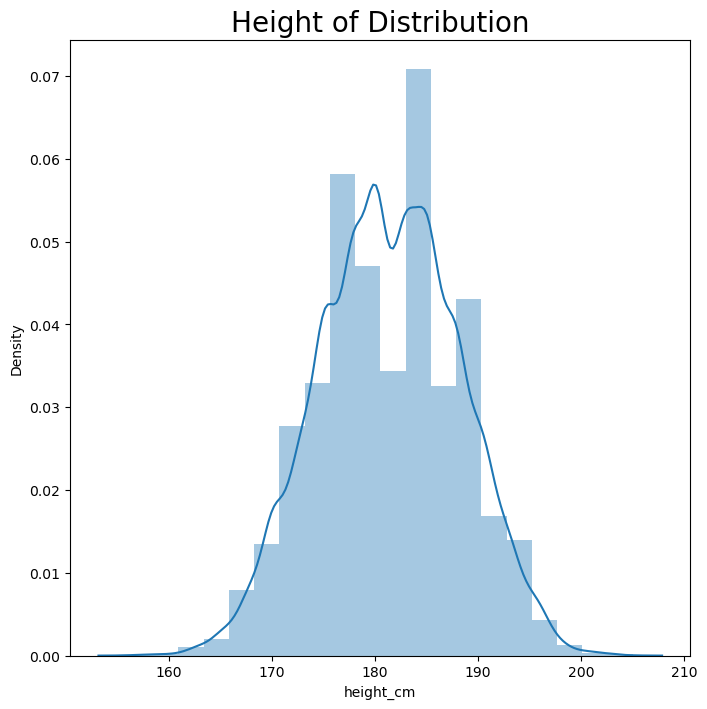

In [12]:
# display the graph of players based on their height in cm.

plt.figure(figsize=(8,8))
sns.distplot(df["height_cm"], kde=True, bins=20)
plt.title('Height of Distribution', fontsize=20)

Insights
* Most players have a height ranging between 178 and 186 centimeters.

Weight 

In [14]:
df['weight_kg'].value_counts()

weight_kg
70     1455
75     1410
80     1060
78     1005
72      983
73      948
74      890
77      880
76      860
68      707
79      659
71      612
82      584
83      532
69      524
81      516
65      488
67      473
84      454
85      445
66      366
64      297
86      296
88      255
87      230
63      207
90      169
62      157
60      142
89      135
92       81
61       81
91       74
93       54
94       42
59       36
58       35
95       29
96       21
57       15
56       13
97       12
98       10
54        6
55        6
101       4
102       3
103       3
99        3
100       2
52        2
104       2
53        2
107       1
110       1
50        1
Name: count, dtype: int64

Text(0.5, 1.0, 'Weight Distribution')

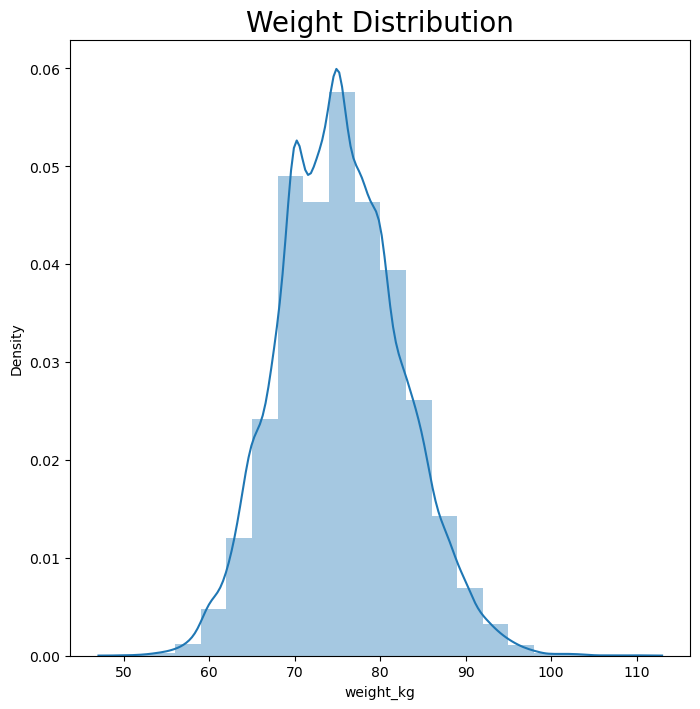

In [16]:
# display the graph of players based on their weight in kg.

plt.figure(figsize=(8,8))
sns.distplot(df["weight_kg"], kde=True, bins=20)
plt.title('Weight Distribution', fontsize=20)

Insight 
* Most players have a weight between 70 and 82 kilograms.

Age

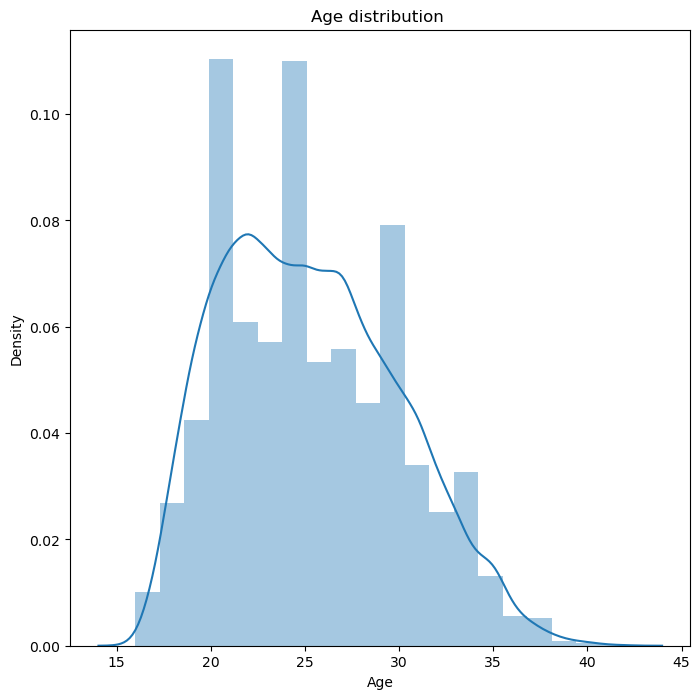

In [18]:
#Age distribution 
plt.figure(figsize=(8, 8))
sns.distplot(df["age"], kde=True, bins=20)
plt.title( 'Age distribution ')
plt.xlabel('Age')
plt.show()

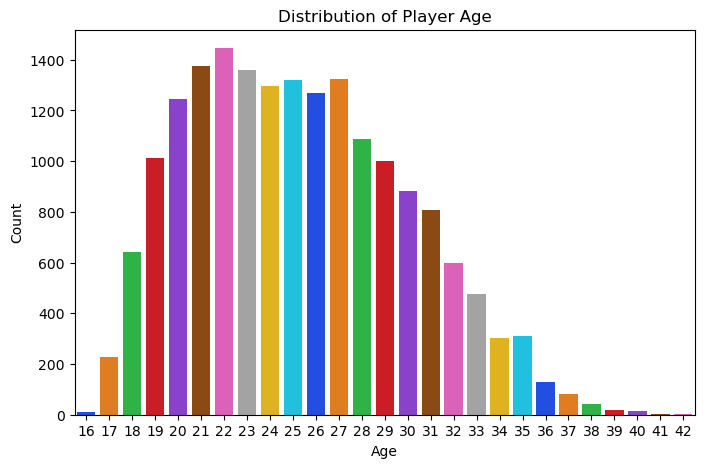

In [15]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df , x='age', palette='bright')
plt.title('Distribution of Player Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Insights
* Most of the players are in between 20 and 27.

Preferred foot

C:\Users\karti\AppData\Local\Temp\ipykernel_4396\4286956378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='preferred_foot', data=df, palette='pastel')


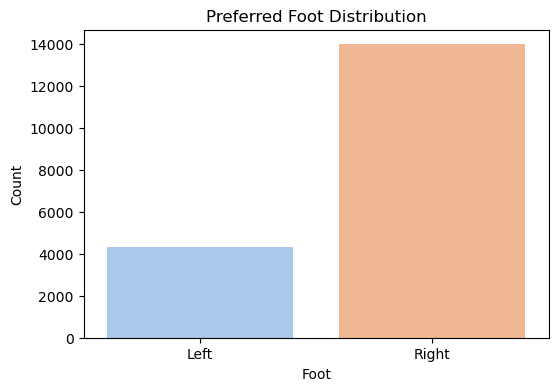

In [19]:
# Preferred foot distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='preferred_foot', data=df, palette='pastel')
plt.title('Preferred Foot Distribution')
plt.xlabel('Foot')
plt.ylabel('Count')
plt.show()

Insights
* almost all players are right footed, with approximately 76% preferring their right foot.

Wages

In [19]:
df.wage_eur.value_counts()

wage_eur
1000      4976
2000      2967
3000      1825
4000      1303
5000       891
          ... 
255000       1
330000       1
93000        1
83000        1
84000        1
Name: count, Length: 141, dtype: int64

<Axes: xlabel='wage_eur', ylabel='Density'>

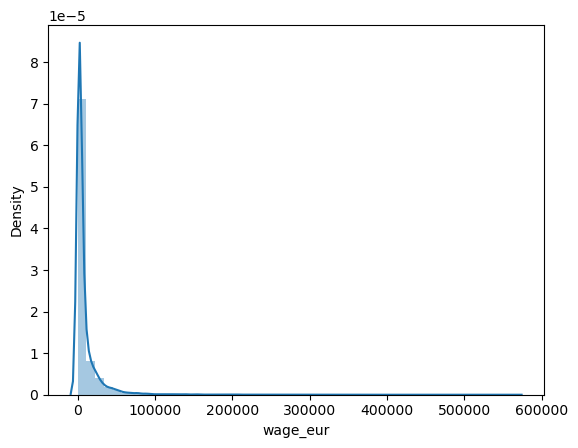

In [20]:
# Graphical Representation of the column 'wage_eur' against 'density'

sns.distplot(a = df["wage_eur"], kde=True)

Insights
* Many of the players have wages under 70000 euros.

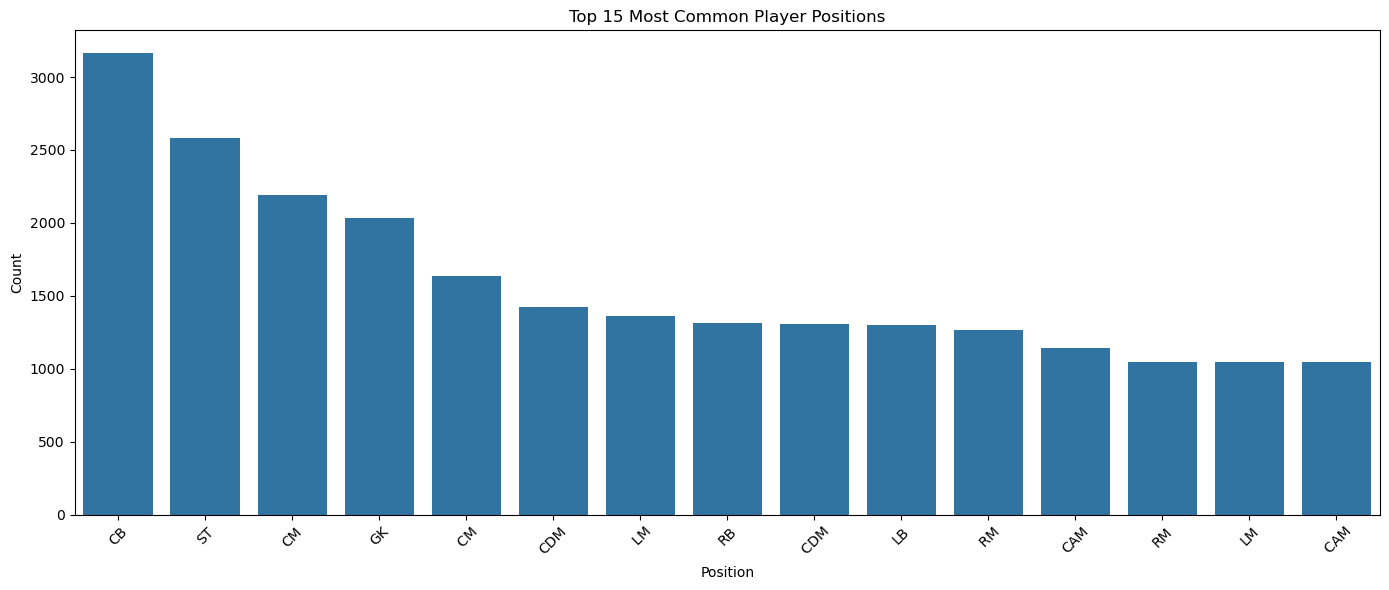

In [24]:
# Player positions distribution
plt.figure(figsize=(14, 6))
top_positions = df['player_positions'].str.split(',').explode().value_counts().head(15)
sns.barplot(x=top_positions.index, y=top_positions.values)
plt.title('Top 15 Most Common Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

In [23]:
# Show the count of players based on their Natinality

df["nationality"].value_counts().head(10)

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64

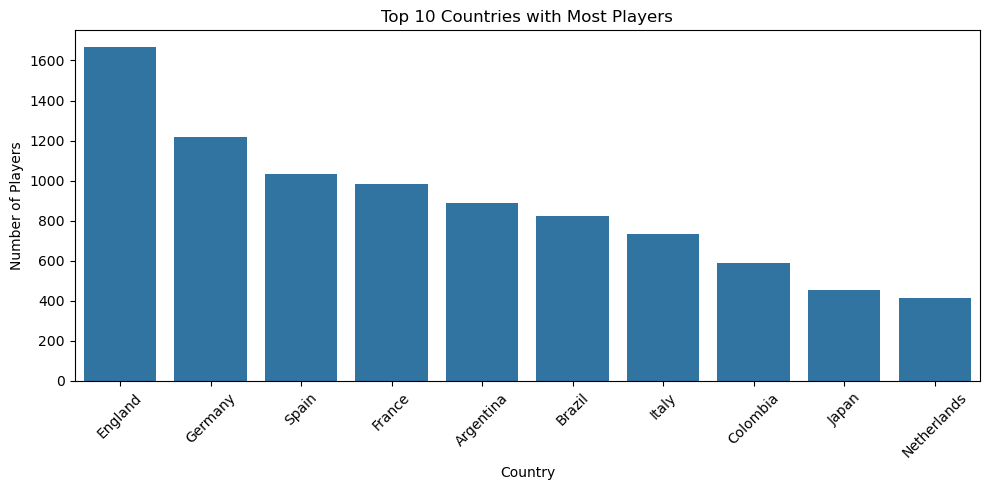

In [12]:
# Top 10 countries with most players
plt.figure(figsize=(10, 5))
top_countries = df['nationality'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with Most Players')
plt.ylabel('Number of Players')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
len(df)

18278

* England producing more no of players. Followed by Germany, Spain, France and continues.
* Around 9% players in the list are from Englend only.

2. Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

<Axes: xlabel='age', ylabel='overall'>

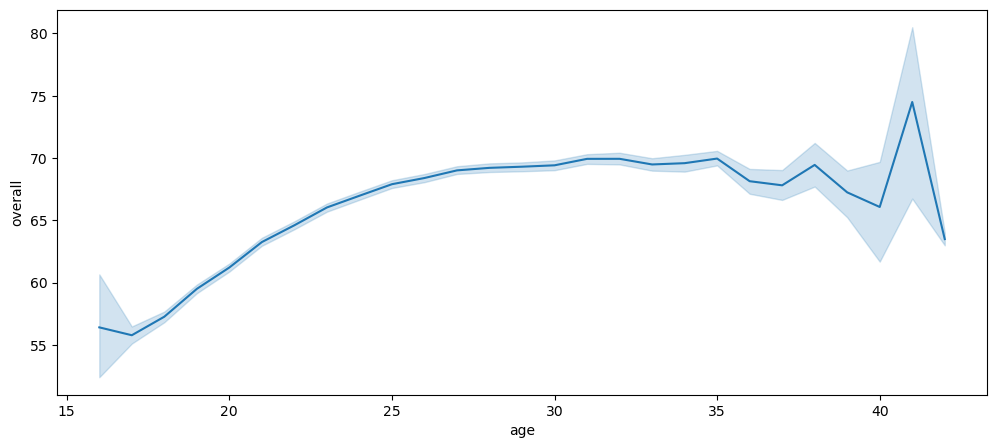

In [8]:
plt.figure(figsize=(12, 5))
sns.lineplot(data =df, x='age', y='overall')

Insights:
* The general trend in player performance over time shows that players tend to improve steadily as they age. They usually reach their highest performance levels around age 30, then begin to decline gradually. However, there's an interesting rebound in performance around age 40. This resurgence might be due to experienced veteran players who bring significant skill and knowledge to the game. This unique pattern adds an interesting dimension to the overall narrative of player growth and performance.

<Axes: xlabel='age', ylabel='potential'>

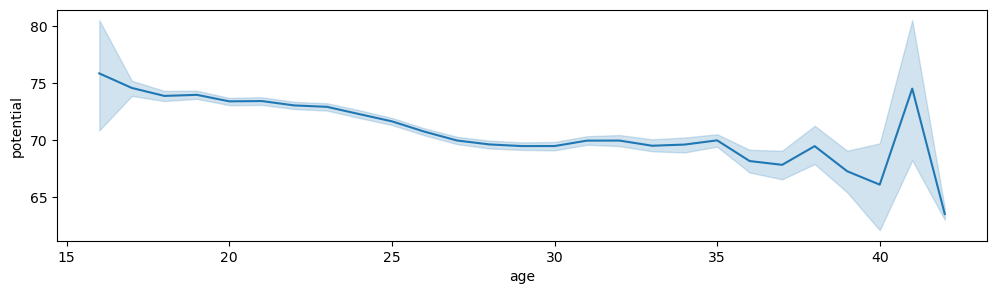

In [10]:
plt.figure(figsize=(12, 3))
sns.lineplot(data =df, x='age', y='potential')

Insights:
* Players in their 20s to early 30s generally show a steady level of performance with only slight variations. During this period, the skills and capabilities of players tend to remain fairly consistent. However, once players reach the age of 35, there's a noticeable increase in their potential, suggesting a surprising level of resilience and sustained skill in this older age group. It's worth noting, though, that this elevated potential starts to decline as players get older, leading to a clear drop in performance after 35.

 3. Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 

In [12]:
# Split the Data of Strikers (ST) into the Right Wingers(RW) and Left Wingers (LW)

RW = df[df['team_position'] == 'RW']
LW = df[df['team_position'] == 'LW']
ST = df[df['team_position'] == 'ST']
offensive_list = [RW,ST,LW]
op_1 = pd.concat(offensive_list)

op_2 = op_1 [['short_name','team_position', 'wage_eur']].sort_values(by='wage_eur', ascending=False).reset_index(drop=True)
op=op_2.groupby(by='team_position', as_index=False)
op.head()

,short_name,team_position,wage_eur
0,L. Messi,RW,565000
1,E. Hazard,LW,470000
2,Cristiano Ronaldo,LW,405000
3,A. Griezmann,LW,370000
4,L. Suárez,ST,355000
5,S. Agüero,ST,300000
6,R. Sterling,LW,255000
7,M. Salah,RW,240000
8,R. Lewandowski,ST,235000
9,S. Mané,LW,220000


In [13]:
op.sum()

,team_position,short_name,wage_eur
0,LW,E. HazardCristiano RonaldoA. GriezmannR. Sterl...,3776000
1,RW,L. MessiM. SalahP. DybalaBernardo SilvaK. Mbap...,3385000
2,ST,L. SuárezS. AgüeroR. LewandowskiH. KaneE. Cava...,7535000


In [16]:
print(op.dtypes)

  short_name team_position wage_eur
0     object        object    int64
1     object        object    int64
2     object        object    int64


In [18]:
# Fetch the Average Wage of Offensive Players based on their Position

avg_wage_op = pd.DataFrame(op['wage_eur'].mean())
avg_wage_op.rename(columns= {"wage_eur":"Average_wage"}, inplace=True)
avg_wage_op.index+=1
avg_wage_op

,team_position,Average_wage
1,LW,23308.641975
2,RW,21024.844720
3,ST,16451.965066


<Axes: xlabel='team_position', ylabel='Average_wage'>

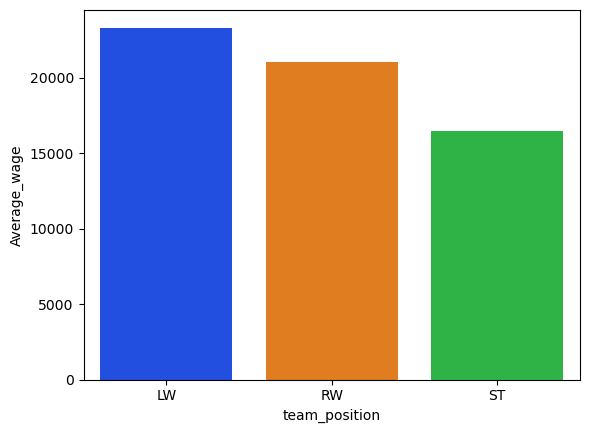

In [20]:
sns.barplot(data = avg_wage_op, x='team_position', y='Average_wage', palette='bright')

Insights:
* through this graph we learn that left wingers gets more wages than strikers and right wingerd
* Left wingers > strikers > Right wingers

Data preprocessing 

Null values

In [39]:
# get all the columns.

columns = ['ls','st','rs', 'lw', 'lf','cf', 'rf', 'rw', 'lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 
           'cdm','rdm','rwb','lb','lcb','cb','rcb','rb'] 

In [41]:
# with split function handle the value of the columns

for col in columns:
    df[col]=df[col].str.split('+', n=1,expand = True)[0]
    df[['ls','st','rs', 'lw', 'lf','cf', 'rf', 'rw', 'lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 
           'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']]=df[columns]
    
# handle null values

df[columns]=df[columns].fillna(0)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68,66,66,66,68,63,52,52,52,63
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65,61,61,61,65,61,53,53,53,61
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66,61,61,61,66,61,46,46,46,61
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,0,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66,63,63,63,66,61,49,49,49,61


In [42]:
df.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 104, dtype: int64

Duplicated values

In [43]:
df.duplicated().sum()

np.int64(0)

Scaling The data

In [44]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
lc = LabelEncoder()

In [46]:
df['nationality']=lc.fit_transform(df["nationality"])
df['club']=lc.fit_transform(df['club'])
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,5,224,...,68,66,66,66,68,63,52,52,52,63
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,121,350,...,65,61,61,61,65,61,53,53,53,61
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,18,462,...,66,61,61,61,66,61,46,46,46,61
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,133,63,...,0,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,12,505,...,66,63,63,63,66,61,49,49,49,61


In [27]:
# Here i am dividing whole data into two parts one is out_player and second one is goalkeeper data

KMEANS-OUTFIELD

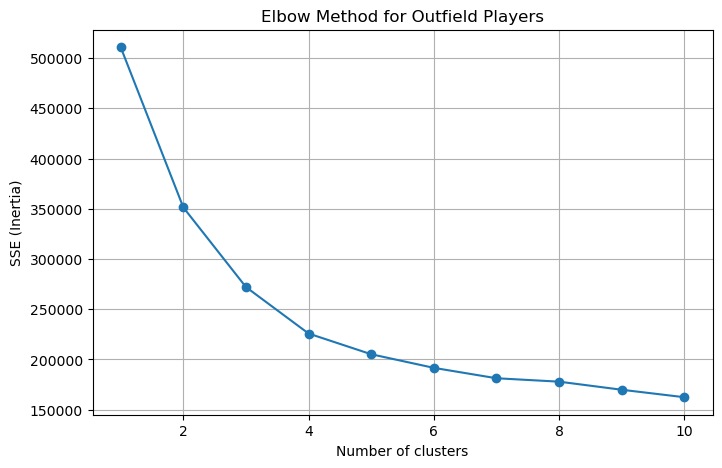

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

outfield_df = df[~df['team_position'].str.contains('GK', na=False)]

expanded_outfield_features = [
   'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power',
    'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
    'mentality_vision', 'mentality_penalties', 'mentality_composure',
    'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle'
]

X_outfield = outfield_df[expanded_outfield_features].dropna()
scaler_out = StandardScaler()
X_outfield_scaled = scaler_out.fit_transform(X_outfield)

# Elbow Method for Outfield Players
sse_outfield = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_outfield_scaled)
    sse_outfield.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse_outfield, marker='o')
plt.title('Elbow Method for Outfield Players')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()


In [12]:
# KMeans with optimal k (example k=5)
kmeans_out = KMeans(n_clusters=3, random_state=42)
outfield_df_clean = outfield_df.loc[X_outfield.index].copy()
outfield_df_clean['cluster'] = kmeans_out.fit_predict(X_outfield_scaled)

In [38]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

labels = outfield_df_clean['cluster']
centroids = kmeans_out.cluster_centers_

# Distances to cluster centroids
distances = np.linalg.norm(X_outfield_scaled - centroids[labels], axis=1)

# Clustering metrics
silhouette = silhouette_score(X_outfield_scaled, labels)
ch_score=calinski_harabasz_score(X_outfield_scaled, labels)
db_score=davies_bouldin_score(X_outfield_scaled, labels)

# Distance-based metrics
mse = np.mean(distances**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(distances))

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.2f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")
print(f"MSE (to centroid): {mse:.4f}")
print(f"RMSE (to centroid): {rmse:.4f}")
print(f"MAE (Mean Absolute Error to centroid): {mae:.4f}")


Silhouette Score: 0.2458
Calinski-Harabasz Score: 7727.87
Davies-Bouldin Index: 1.3359
MSE (to centroid): 15.4459
RMSE (to centroid): 3.9301
MAE (Mean Absolute Error to centroid): 3.7945


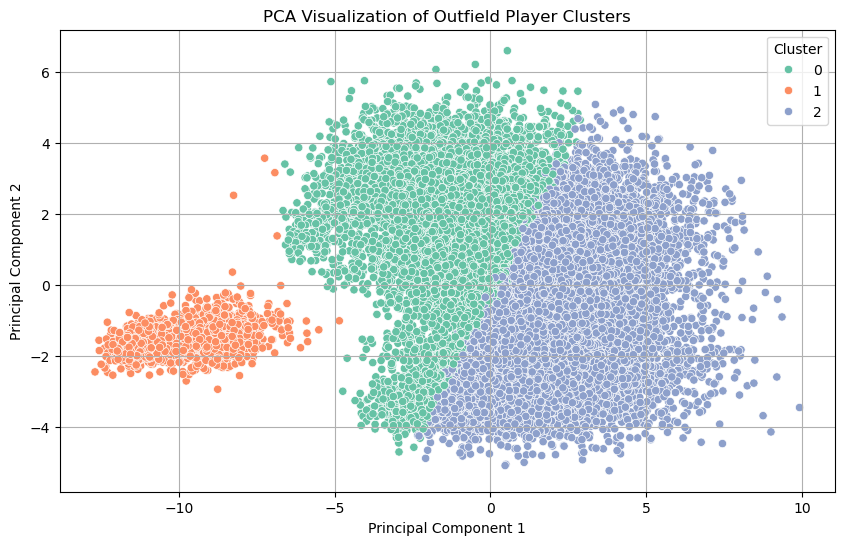

In [14]:
from sklearn.decomposition import PCA
# PCA Visualization

# KMeans with optimal k (example k=5)
kmeans_out = KMeans(n_clusters=3, random_state=42)
outfield_df_clean = outfield_df.loc[X_outfield.index].copy()
outfield_df_clean['cluster'] = kmeans_out.fit_predict(X_outfield_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_outfield_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=outfield_df_clean['cluster'], palette='Set2')
plt.title('PCA Visualization of Outfield Player Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

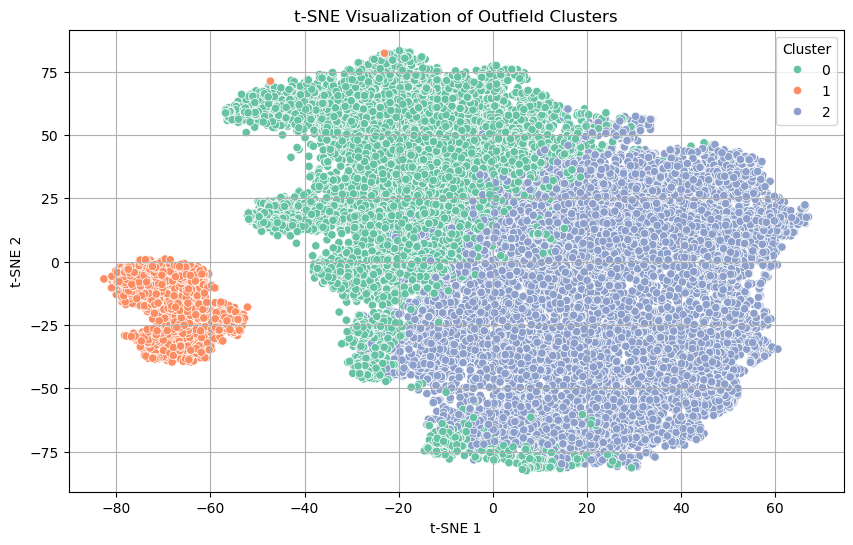

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_outfield_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=outfield_df_clean['cluster'], palette='Set2')
plt.title('t-SNE Visualization of Outfield Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


KMEANS-GOALKEEPER


Goalkeeper Clustering Evaluation
Silhouette Score: 0.2809
Calinski-Harabasz Score: 352.03
Davies-Bouldin Index: 1.2784
MSE (to centroid): 6.5216
RMSE (to centroid): 2.5537
MAE (Mean Absolute Error to centroid): 2.4285


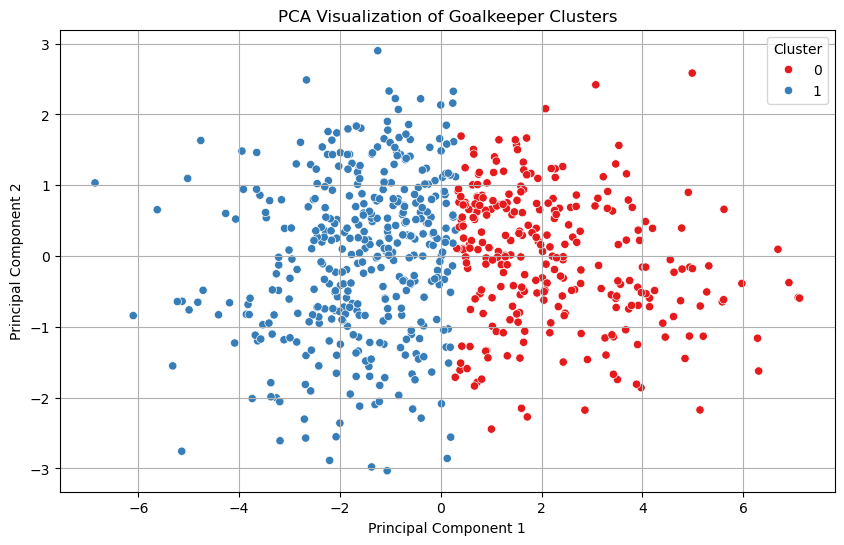

In [17]:
df = pd.read_csv('players_20.csv')
gk_df = df[df['team_position'].str.contains('GK', na=False)]

gk_features = [
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
    'goalkeeping_positioning', 'goalkeeping_reflexes',
    'movement_reactions',
    'power_jumping', 'power_strength',
    'mentality_composure', 'mentality_positioning'
]

X_gk = gk_df[gk_features].dropna()
scaler_gk = StandardScaler()
X_gk_scaled = scaler_gk.fit_transform(X_gk)

# KMeans with optimal k = 2
kmeans_gk = KMeans(n_clusters=2, random_state=42)
gk_df_clean = gk_df.loc[X_gk.index].copy()
gk_df_clean['cluster'] = kmeans_gk.fit_predict(X_gk_scaled)

# Evaluation Metrics for GK
labels_gk = gk_df_clean['cluster']
centroids_gk = kmeans_gk.cluster_centers_
distances_gk = np.linalg.norm(X_gk_scaled - centroids_gk[labels_gk], axis=1)

silhouette_gk = silhouette_score(X_gk_scaled, labels_gk)
ch_score_gk = calinski_harabasz_score(X_gk_scaled, labels_gk)
db_score_gk = davies_bouldin_score(X_gk_scaled, labels_gk)
mse_gk = np.mean(distances_gk**2)
rmse_gk = np.sqrt(mse_gk)
mae_gk = np.mean(np.abs(distances_gk))

print(f"\nGoalkeeper Clustering Evaluation")
print(f"Silhouette Score: {silhouette_gk:.4f}")
print(f"Calinski-Harabasz Score: {ch_score_gk:.2f}")
print(f"Davies-Bouldin Index: {db_score_gk:.4f}")
print(f"MSE (to centroid): {mse_gk:.4f}")
print(f"RMSE (to centroid): {rmse_gk:.4f}")
print(f"MAE (Mean Absolute Error to centroid): {mae_gk:.4f}")

# PCA Visualization for Goalkeepers
pca_gk = PCA(n_components=2)
X_pca_gk = pca_gk.fit_transform(X_gk_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_gk[:, 0], y=X_pca_gk[:, 1], hue=gk_df_clean['cluster'], palette='Set1')
plt.title('PCA Visualization of Goalkeeper Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

HIERARCHICAL CLUSTERING-OUTFIELD

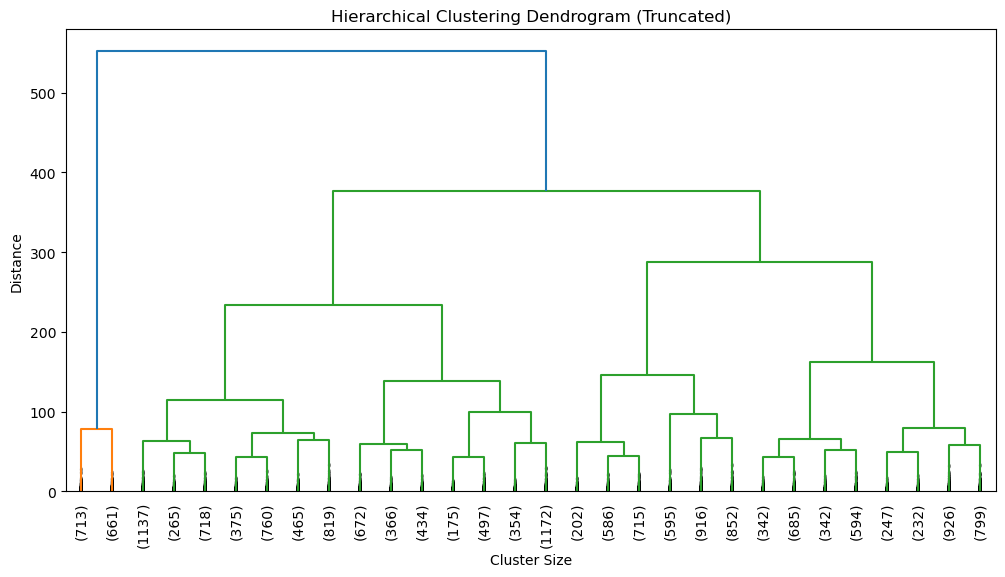

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Generate the linkage matrix
linked = linkage(X_outfield_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


In [19]:
from sklearn.cluster import AgglomerativeClustering

agg_clust = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
outfield_df_clean['agg_cluster'] = agg_clust.fit_predict(X_outfield_scaled)


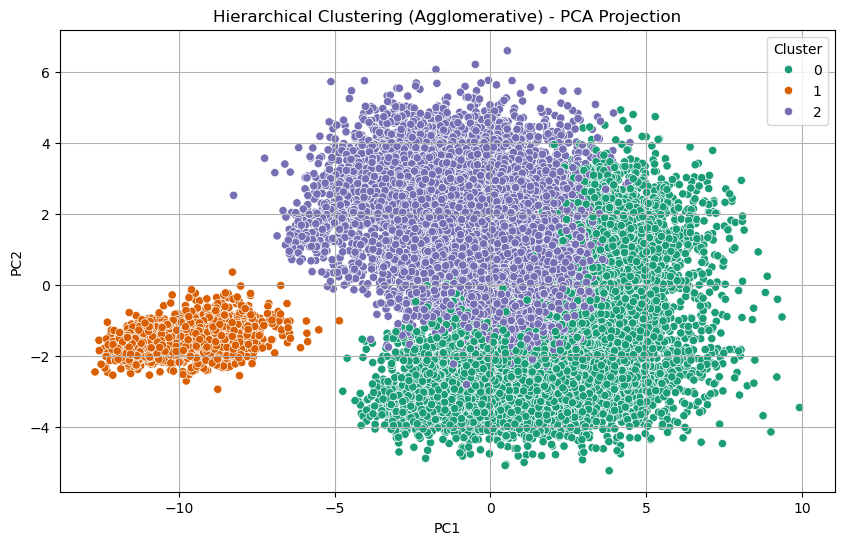

In [20]:
# Optional: PCA visualization of Agglomerative Clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_outfield_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=outfield_df_clean['agg_cluster'], palette='Dark2')
plt.title('Hierarchical Clustering (Agglomerative) - PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [21]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Get labels from Agglomerative Clustering
agg_labels = outfield_df_clean['agg_cluster']

# Evaluation metrics
silhouette_agg = silhouette_score(X_outfield_scaled, agg_labels)
ch_score_agg = calinski_harabasz_score(X_outfield_scaled, agg_labels)
db_score_agg = davies_bouldin_score(X_outfield_scaled, agg_labels)

# Manual centroid computation (not provided by AgglomerativeClustering)
# So we compute the centroid of each cluster
centroids_agg = np.array([X_outfield_scaled[agg_labels == i].mean(axis=0) for i in np.unique(agg_labels)])
distances_agg = np.linalg.norm(X_outfield_scaled - centroids_agg[agg_labels], axis=1)

# Distance-based metrics
mse_agg = np.mean(distances_agg**2)
rmse_agg = np.sqrt(mse_agg)
mae_agg = np.mean(np.abs(distances_agg))

# Print all metrics
print(f"Silhouette Score (Agglomerative): {silhouette_agg:.4f}")
print(f"Calinski-Harabasz Score (Agglomerative): {ch_score_agg:.2f}")
print(f"Davies-Bouldin Index (Agglomerative): {db_score_agg:.4f}")
print(f"MSE (to centroid): {mse_agg:.4f}")
print(f"RMSE (to centroid): {rmse_agg:.4f}")
print(f"MAE (Mean Absolute Error to centroid): {mae_agg:.4f}")


Silhouette Score (Agglomerative): 0.2117
Calinski-Harabasz Score (Agglomerative): 6847.43
Davies-Bouldin Index (Agglomerative): 1.4855
MSE (to centroid): 16.3147
RMSE (to centroid): 4.0391
MAE (Mean Absolute Error to centroid): 3.8919


HIERARCHICAL CLUSTERING-Goalkeeper

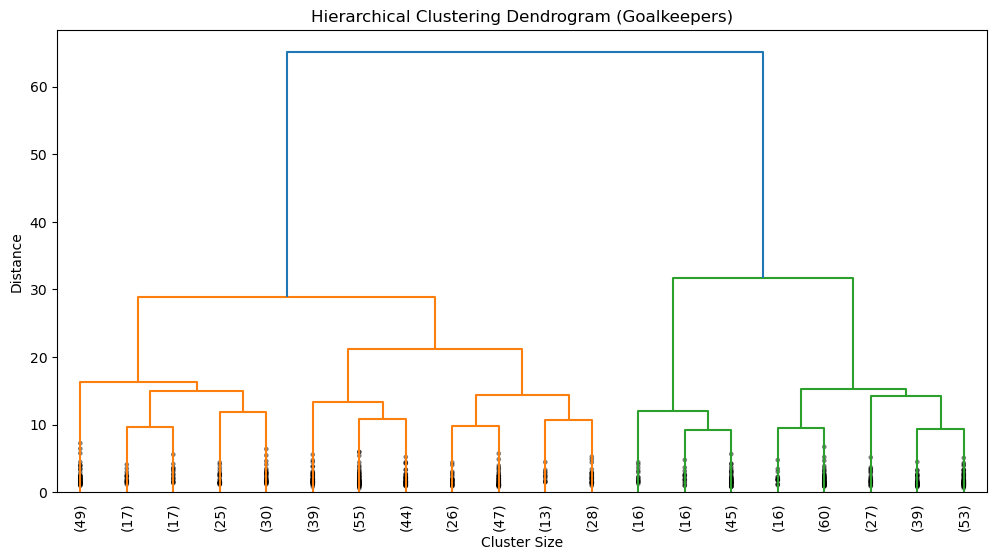

In [22]:
# Step 1: Dendrogram to choose k
linked_gk = linkage(X_gk_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked_gk, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Goalkeepers)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [23]:
# Step 2: Agglomerative Clustering with chosen k (example: k=2)
agg_gk = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
gk_df_clean['agg_cluster'] = agg_gk.fit_predict(X_gk_scaled)

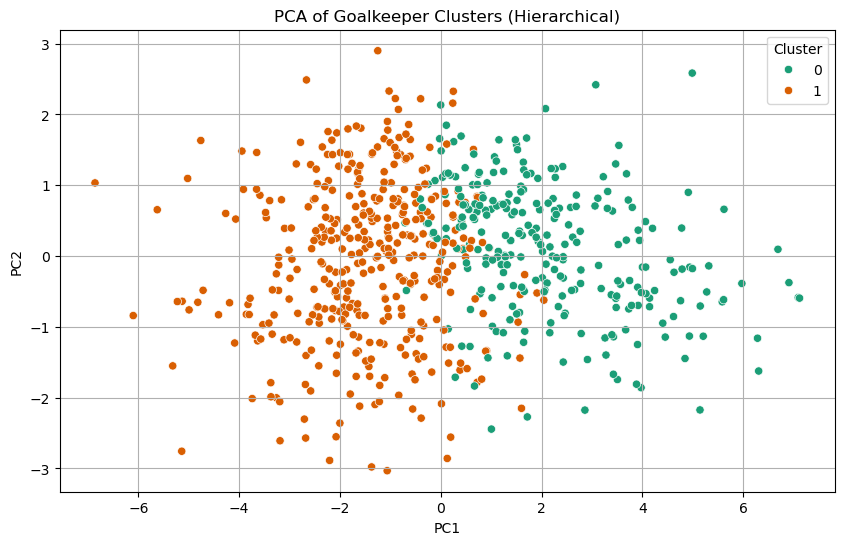

In [24]:
# Step 3: PCA Visualization
pca_gk = PCA(n_components=2)
X_gk_pca = pca_gk.fit_transform(X_gk_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_gk_pca[:, 0], y=X_gk_pca[:, 1], hue=gk_df_clean['agg_cluster'], palette='Dark2')
plt.title('PCA of Goalkeeper Clusters (Hierarchical)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [25]:
# Step 4: Evaluation Metrics
agg_labels_gk = gk_df_clean['agg_cluster']
centroids_gk_agg = np.array([X_gk_scaled[agg_labels_gk == i].mean(axis=0) for i in np.unique(agg_labels_gk)])
distances_gk_agg = np.linalg.norm(X_gk_scaled - centroids_gk_agg[agg_labels_gk], axis=1)

# Scores
silhouette_gk_agg = silhouette_score(X_gk_scaled, agg_labels_gk)
ch_score_gk_agg = calinski_harabasz_score(X_gk_scaled, agg_labels_gk)
db_score_gk_agg = davies_bouldin_score(X_gk_scaled, agg_labels_gk)
mse_gk_agg = np.mean(distances_gk_agg**2)
rmse_gk_agg = np.sqrt(mse_gk_agg)
mae_gk_agg = np.mean(np.abs(distances_gk_agg))

print(f"Silhouette Score (GK - Agglomerative): {silhouette_gk_agg:.4f}")
print(f"Calinski-Harabasz Score (GK - Agglomerative): {ch_score_gk_agg:.2f}")
print(f"Davies-Bouldin Index (GK - Agglomerative): {db_score_gk_agg:.4f}")
print(f"MSE (to centroid): {mse_gk_agg:.4f}")
print(f"RMSE (to centroid): {rmse_gk_agg:.4f}")
print(f"MAE (Mean Absolute Error to centroid): {mae_gk_agg:.4f}")

Silhouette Score (GK - Agglomerative): 0.2535
Calinski-Harabasz Score (GK - Agglomerative): 310.81
Davies-Bouldin Index (GK - Agglomerative): 1.3541
MSE (to centroid): 6.7985
RMSE (to centroid): 2.6074
MAE (Mean Absolute Error to centroid): 2.4766


DBSCAN-Outfield

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# 1. Apply DBSCAN to Outfield Players
dbscan_out = DBSCAN(eps=2.0, min_samples=5)  # You can tune eps and min_samples
outfield_df_clean['dbscan_cluster'] = dbscan_out.fit_predict(X_outfield_scaled)

In [27]:
# 2. Check number of clusters (excluding noise = -1)
n_dbscan_clusters = len(set(outfield_df_clean['dbscan_cluster'])) - (1 if -1 in outfield_df_clean['dbscan_cluster'].unique() else 0)
print(f"DBSCAN Clusters (Outfield): {n_dbscan_clusters}")

DBSCAN Clusters (Outfield): 7


In [28]:
# 3. Evaluation (if enough clusters are formed)
db_labels = outfield_df_clean['dbscan_cluster']
if n_dbscan_clusters > 1:
    silhouette_db = silhouette_score(X_outfield_scaled, db_labels)
    ch_score_db = calinski_harabasz_score(X_outfield_scaled, db_labels)
    db_score_db = davies_bouldin_score(X_outfield_scaled, db_labels)

    # Manual centroid approximation
    centroids_db = np.array([X_outfield_scaled[db_labels == i].mean(axis=0) for i in np.unique(db_labels) if i != -1])
    db_labels_clipped = np.clip(db_labels, a_min=0, a_max=None)
    distances_db = np.linalg.norm(X_outfield_scaled - centroids_db[db_labels_clipped], axis=1)


    mse_db = np.mean(distances_db**2)
    rmse_db = np.sqrt(mse_db)
    mae_db = np.mean(np.abs(distances_db))

    print(f"Silhouette Score (DBSCAN): {silhouette_db:.4f}")
    print(f"Calinski-Harabasz Score (DBSCAN): {ch_score_db:.2f}")
    print(f"Davies-Bouldin Index (DBSCAN): {db_score_db:.4f}")
    print(f"MSE (to centroid): {mse_db:.4f}")
    print(f"RMSE (to centroid): {rmse_db:.4f}")
    print(f"MAE (Mean Absolute Error to centroid): {mae_db:.4f}")
else:
    print("Too few clusters formed to compute evaluation metrics.")

Silhouette Score (DBSCAN): -0.2330
Calinski-Harabasz Score (DBSCAN): 734.91
Davies-Bouldin Index (DBSCAN): 4.0870
MSE (to centroid): 42.4545
RMSE (to centroid): 6.5157
MAE (Mean Absolute Error to centroid): 5.8729


DBSCAN after PCA

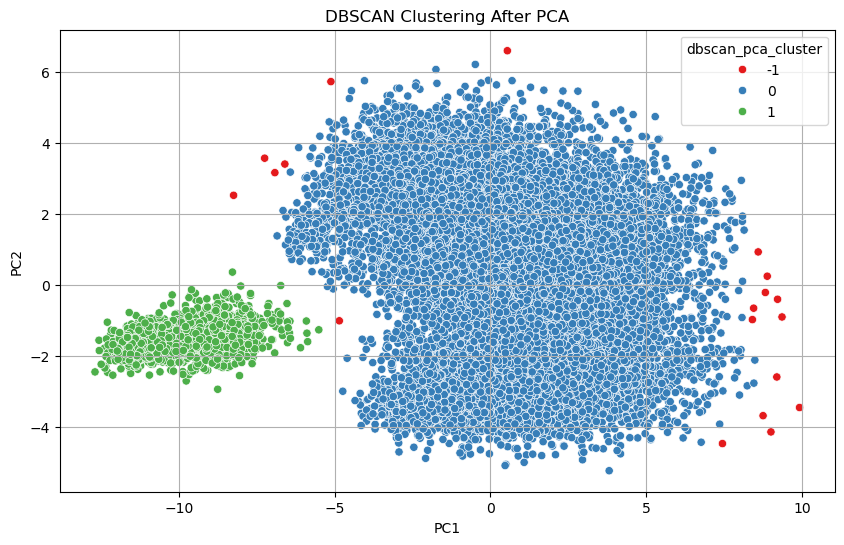

Silhouette Score (PCA+DBSCAN): 0.4747905741499646
Calinski-Harabasz Score (PCA+DBSCAN): 6327.833638653213
Davies-Bouldin Index (PCA+DBSCAN): 2.810513298780014
RMSE: 3.4098481993749115
MAE: 3.0622546648249185


In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca_outfield = pca.fit_transform(X_outfield_scaled)

# Step 2: Apply DBSCAN
dbscan_pca = DBSCAN(eps=0.75, min_samples=10)  # You can tune eps
outfield_df_clean['dbscan_pca_cluster'] = dbscan_pca.fit_predict(X_pca_outfield)

# Step 3: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_outfield[:, 0], y=X_pca_outfield[:, 1], hue=outfield_df_clean['dbscan_pca_cluster'], palette='Set1')
plt.title('DBSCAN Clustering After PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Step 4: Metrics (only if more than 1 cluster found)
labels_pca = outfield_df_clean['dbscan_pca_cluster']
if len(set(labels_pca)) > 1 and -1 in set(labels_pca):
    labels_clipped = np.clip(labels_pca, a_min=0, a_max=None)
    centroids = np.array([X_pca_outfield[labels_pca == i].mean(axis=0) for i in np.unique(labels_pca) if i != -1])
    distances = np.linalg.norm(X_pca_outfield - centroids[labels_clipped], axis=1)
    
    print("Silhouette Score (PCA+DBSCAN):", silhouette_score(X_pca_outfield, labels_pca))
    print("Calinski-Harabasz Score (PCA+DBSCAN):", calinski_harabasz_score(X_pca_outfield, labels_pca))
    print("Davies-Bouldin Index (PCA+DBSCAN):", davies_bouldin_score(X_pca_outfield, labels_pca))
    print("RMSE:", np.sqrt(np.mean(distances**2)))
    print("MAE:", np.mean(np.abs(distances)))
else:
    print("Too few clusters formed to compute metrics.")


In [35]:
import numpy as np
unique_labels = np.unique(labels)
print(f"Clusters found: {len(unique_labels[unique_labels != -1])}")
print(f"Noise points: {np.sum(labels == -1)}")

Clusters found: 3
Noise points: 0


DBSCAN after t-SNE

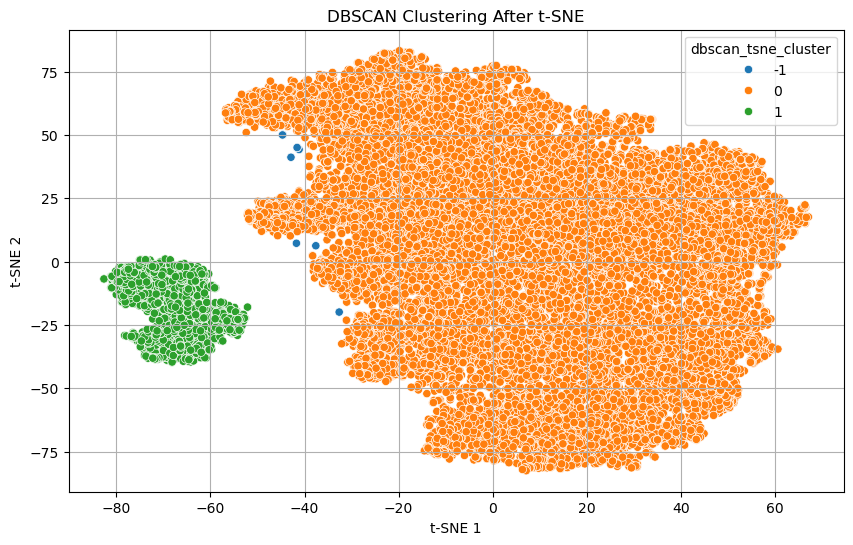

In [31]:
from sklearn.manifold import TSNE

# Step 1: t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_outfield = tsne.fit_transform(X_outfield_scaled)

# Step 2: DBSCAN on t-SNE
dbscan_tsne = DBSCAN(eps=3.0, min_samples=5)
outfield_df_clean['dbscan_tsne_cluster'] = dbscan_tsne.fit_predict(X_tsne_outfield)

# Step 3: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne_outfield[:, 0], y=X_tsne_outfield[:, 1], hue=outfield_df_clean['dbscan_tsne_cluster'], palette='tab10')
plt.title('DBSCAN Clustering After t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()


DBSCAN- GOALKEEPER

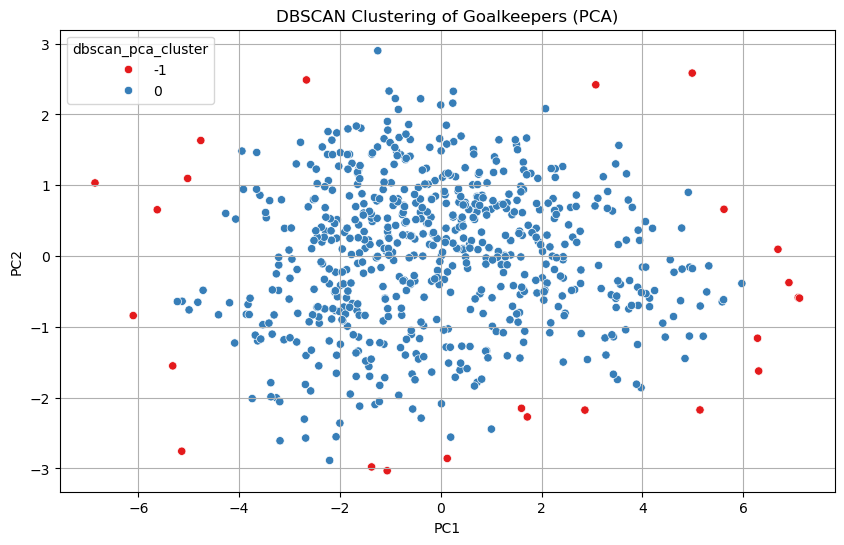

Silhouette Score (GK - PCA+DBSCAN): 0.44320173478426433
Calinski-Harabasz Score: 4.519314531986416
Davies-Bouldin Index: 6.279541097965389
RMSE: 2.5492023815997165
MAE: 2.19155437384052


In [37]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: PCA
pca_gk = PCA(n_components=2)
X_gk_pca = pca_gk.fit_transform(X_gk_scaled)

# Step 2: DBSCAN
dbscan_gk = DBSCAN(eps=0.7, min_samples=5)  # Tune eps as needed
gk_df_clean['dbscan_pca_cluster'] = dbscan_gk.fit_predict(X_gk_pca)

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_gk_pca[:, 0], y=X_gk_pca[:, 1], hue=gk_df_clean['dbscan_pca_cluster'], palette='Set1')
plt.title('DBSCAN Clustering of Goalkeepers (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Step 4: Evaluation (if multiple clusters)
labels_gk = gk_df_clean['dbscan_pca_cluster']
if len(set(labels_gk)) > 1 and -1 in set(labels_gk):
    labels_clipped = np.clip(labels_gk, a_min=0, a_max=None)
    centroids = np.array([X_gk_pca[labels_gk == i].mean(axis=0) for i in np.unique(labels_gk) if i != -1])
    distances = np.linalg.norm(X_gk_pca - centroids[labels_clipped], axis=1)

    print("Silhouette Score (GK - PCA+DBSCAN):", silhouette_score(X_gk_pca, labels_gk))
    print("Calinski-Harabasz Score:", calinski_harabasz_score(X_gk_pca, labels_gk))
    print("Davies-Bouldin Index:", davies_bouldin_score(X_gk_pca, labels_gk))
    print("RMSE:", np.sqrt(np.mean(distances**2)))
    print("MAE:", np.mean(np.abs(distances)))
else:
    print("Too few clusters formed for evaluation.")


In [ ]:
from sklearn.manifold import TSNE

# Step 1: t-SNE
tsne_gk = TSNE(n_components=2, perplexity=30, random_state=42)
X_gk_tsne = tsne_gk.fit_transform(X_gk_scaled)

# Step 2: DBSCAN
dbscan_tsne_gk = DBSCAN(eps=3.0, min_samples=5)
gk_df_clean['dbscan_tsne_cluster'] = dbscan_tsne_gk.fit_predict(X_gk_tsne)

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_gk_tsne[:, 0], y=X_gk_tsne[:, 1], hue=gk_df_clean['dbscan_tsne_cluster'], palette='tab10')
plt.title('DBSCAN Clustering of Goalkeepers (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.show()


CONCLUSION 

In this analysis, we applied unsupervised clustering techniques to segment goalkeepers based on their performance attributes using PCA for dimensionality reduction. While DBSCAN initially provided a better silhouette score (0.443), indicating moderate cluster structure, it struggled with poor Calinski-Harabasz (4.52) and high Davies-Bouldin Index (6.28), which pointed to weak separation and overlapping clusters. This suggested that DBSCAN, although density-based and flexible, was less suited for the relatively compact and homogeneous nature of goalkeeper data.

On the other hand, K-Means produced more stable and interpretable results for goalkeepers. With a silhouette score of 0.2809 and significantly improved Calinski-Harabasz (352.03) and Davies-Bouldin Index (1.27), it showed that goalkeepers cluster better in spherical, well-separated groups. These clusters, when visualized and profiled, can be useful in identifying different goalkeeper archetypes such as traditional shot-stoppers, sweeper keepers, or distribution-focused players. Thus, for goalkeeper segmentation, K-Means emerges as the more effective and reliable clustering method in this study.